In [183]:
import importlib
import data_analysis
importlib.reload(data_analysis)
import importlib
import visualization
importlib.reload(visualization)
import classification
importlib.reload(classification)
import my_logging
importlib.reload(my_logging)

<module 'my_logging' from '/content/my_logging.py'>

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smo

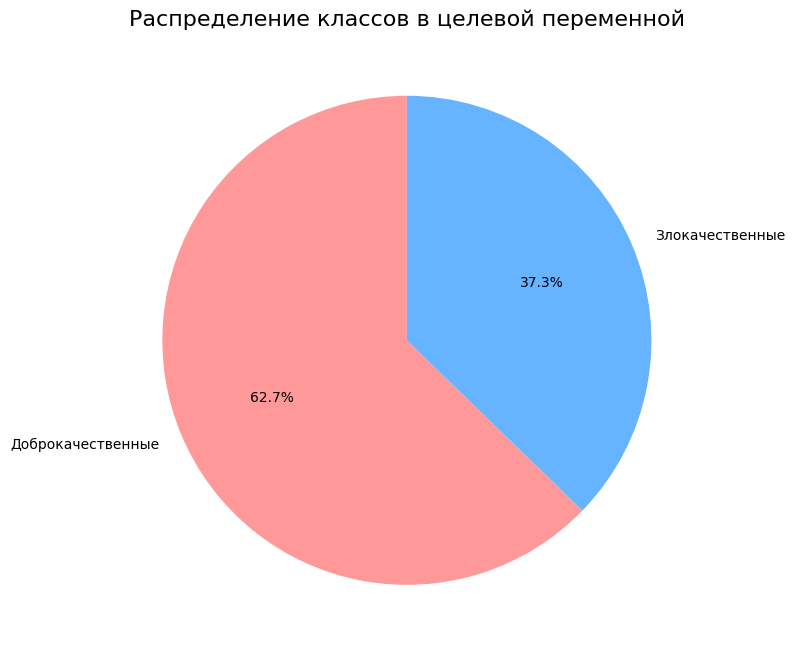


Таблица корреляции до удаления признаков:
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765

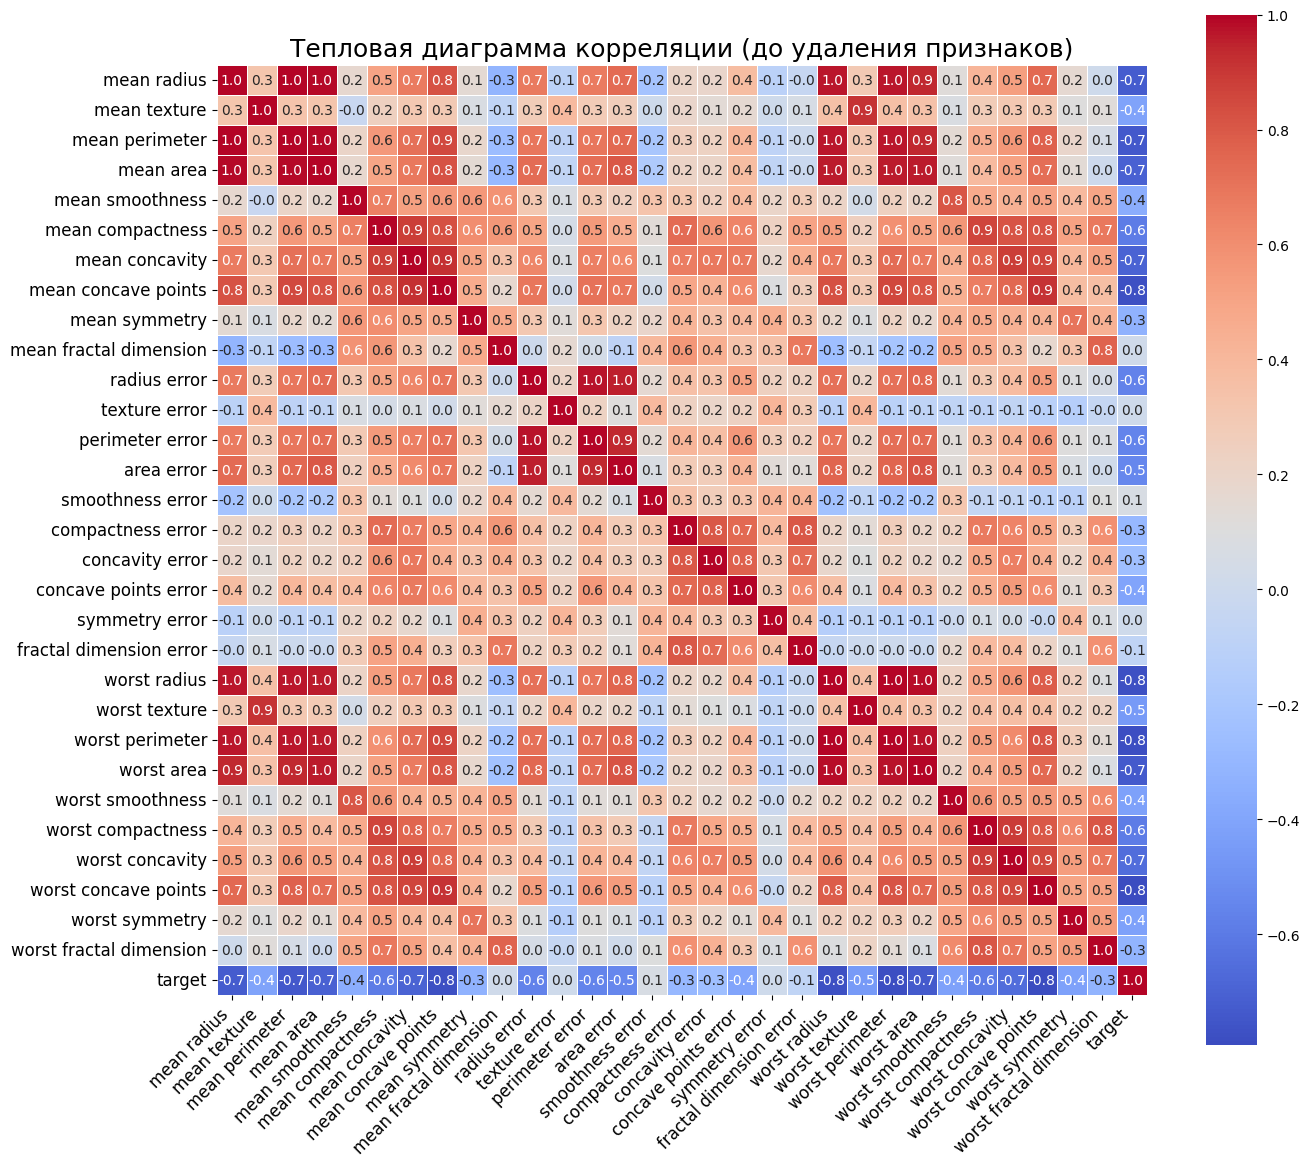


Удаление сильно коррелирующих признаков...
Удалено 10 признаков: ['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']

Удаленные признаки из-за высокой корреляции: ['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']

Таблица корреляции после удаления признаков:
                         mean radius  mean texture  mean smoothness  \
mean radius                 1.000000      0.323782         0.170581   
mean texture                0.323782      1.000000        -0.023389   
mean smoothness             0.170581     -0.023389         1.000000   
mean compactness            0.506124      0.236702         0.659123   
mean concavity              0.676764      0.302418         0.521984   
mean symmetry               0.147741      0.071401         0

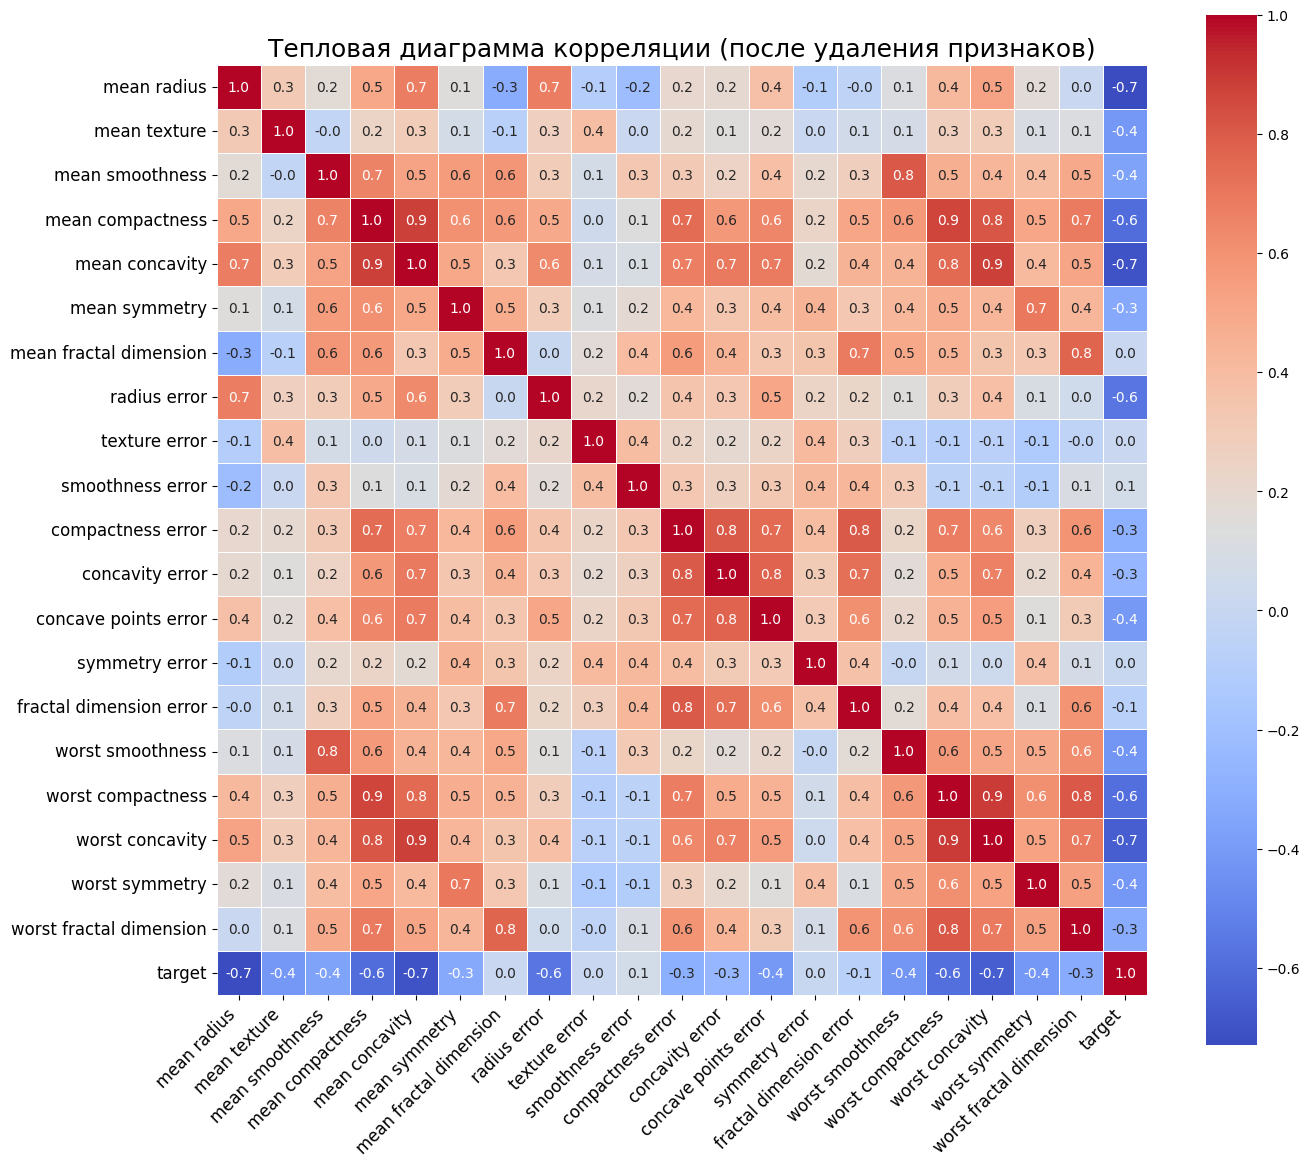

Обучение классификатора: GradientBoosting
Обучение классификатора: CatBoost
Обучение классификатора: AdaBoost
Обучение классификатора: ExtraTrees
Обучение классификатора: QDA
Обучение классификатора: LightGBM
Обучение классификатора: KNeighbors
Обучение классификатора: DecisionTree
Обучение классификатора: XGBoost
Обучение классификатора: Dummy
Обучение классификатора: SVM (Linear Kernel)
Обучение классификатора: GradientBoosting
Обучение классификатора: CatBoost
Обучение классификатора: AdaBoost
Обучение классификатора: ExtraTrees
Обучение классификатора: QDA
Обучение классификатора: LightGBM
Обучение классификатора: KNeighbors
Обучение классификатора: DecisionTree
Обучение классификатора: XGBoost
Обучение классификатора: Dummy
Обучение классификатора: SVM (Linear Kernel)


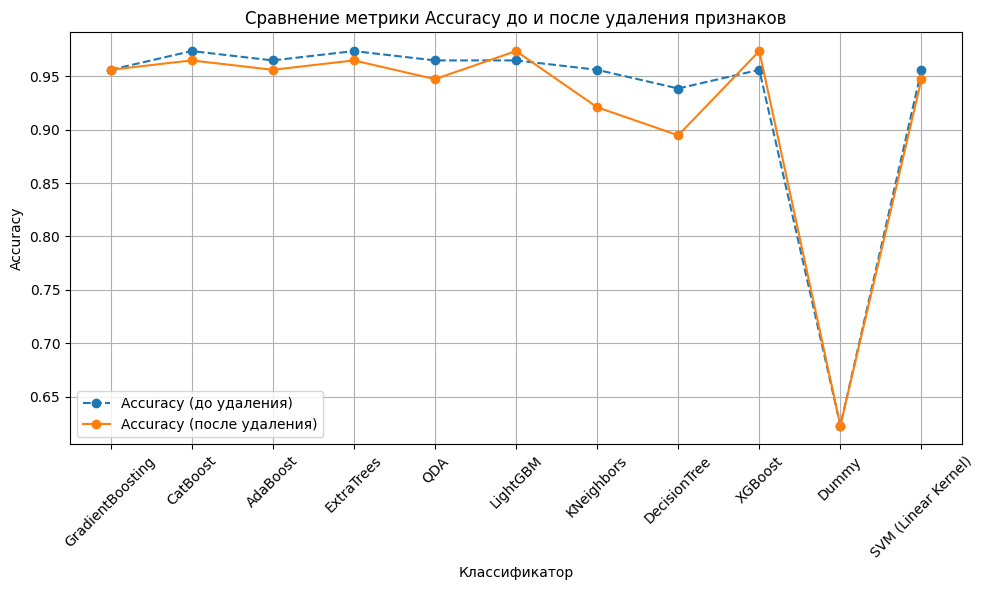

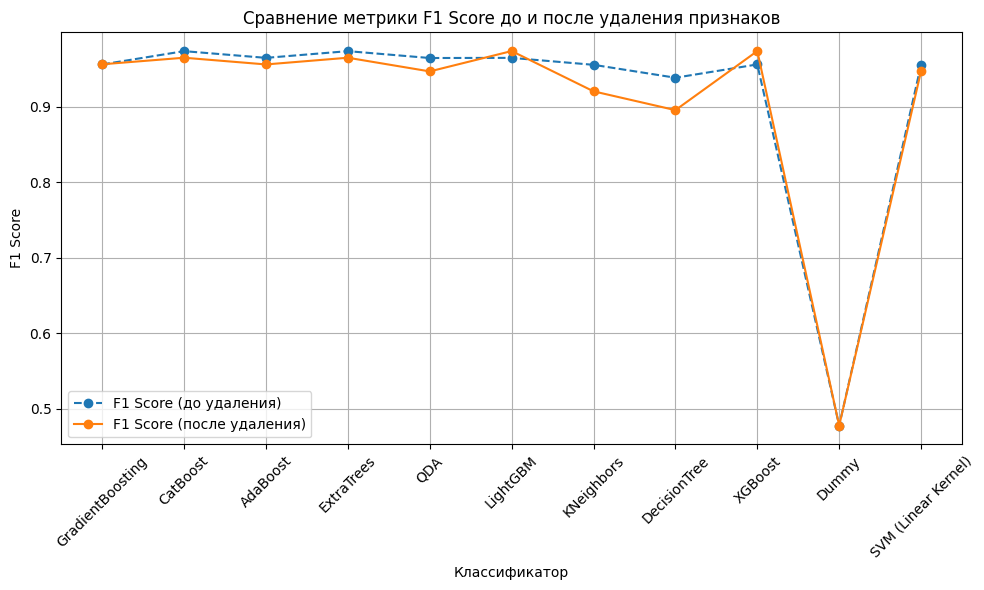

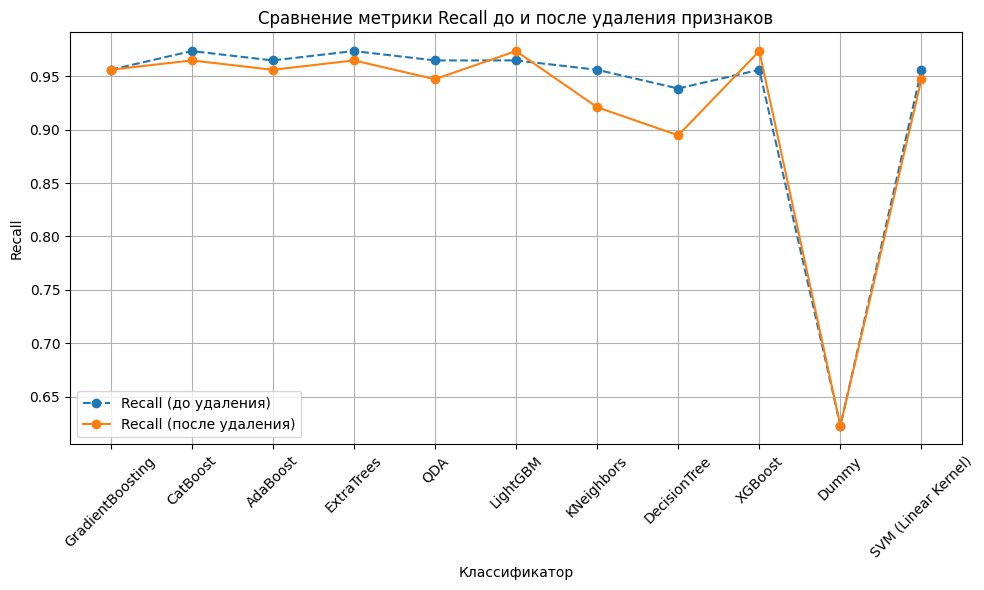

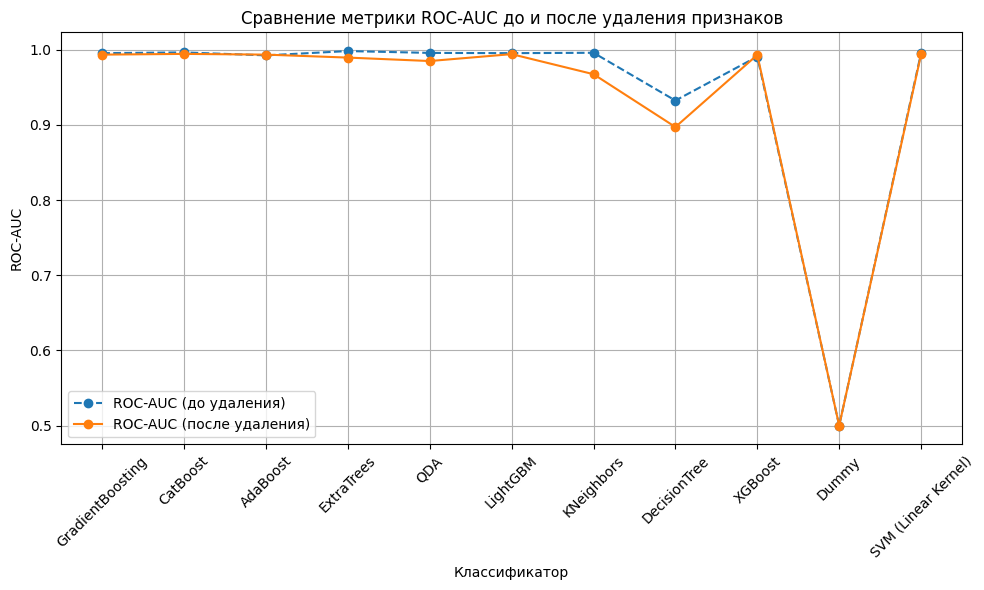


Топ-5 классификаторов (после удаления корреляции):
         Classifier  Accuracy  F1 Score    Recall   ROC-AUC  Mean Score
5          LightGBM  0.973684  0.973742  0.973684  0.994104    0.978804
8           XGBoost  0.973684  0.973742  0.973684  0.993122    0.978558
1          CatBoost  0.964912  0.964912  0.964912  0.994432    0.972292
3        ExtraTrees  0.964912  0.964912  0.964912  0.989519    0.971064
0  GradientBoosting  0.956140  0.956237  0.956140  0.993449    0.965492


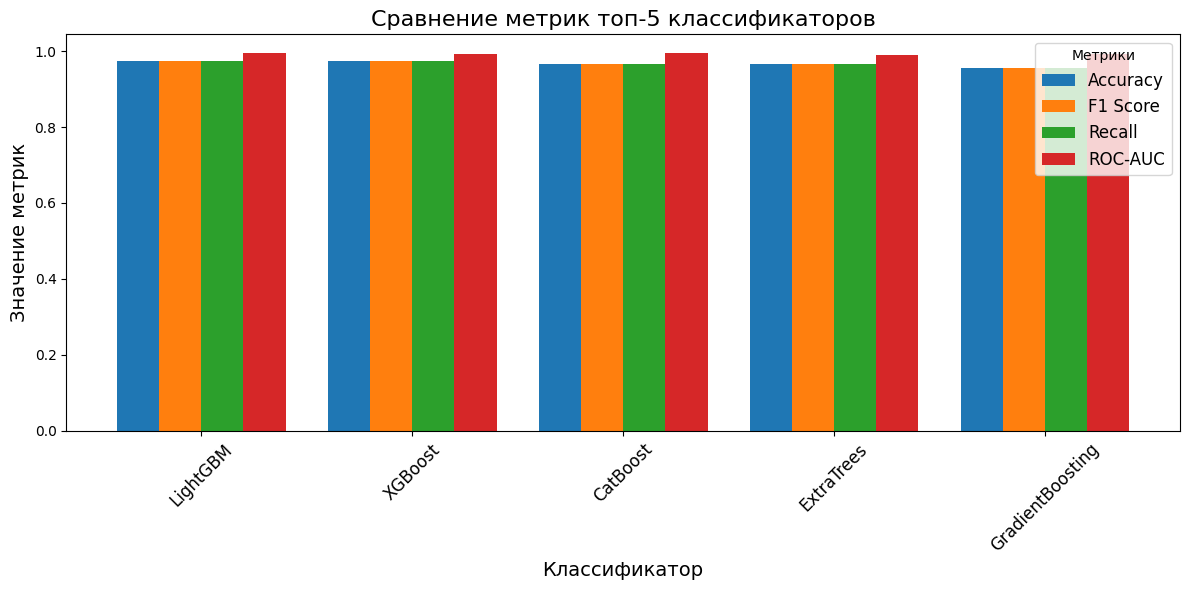

In [185]:
!pip freeze > requirements.txt
import os
from my_logging import setup_logging
from sklearn.datasets import load_breast_cancer
from data_analysis import DataAnalyzer
from visualization import DataVisualizer
from classification import ClassifierComparison
from save import save_to_csv
from sklearn.model_selection import train_test_split
import pandas as pd

if __name__ == "__main__":
    try:
        # Настройка логирования через my_logging
        log_file = "program.log"  # Укажите путь к файлу логов
        logger = setup_logging(log_file=log_file)

        # Создание папки для сохранения данных
        output_folder = "output_data"
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
            logger.info(f"Создана папка для сохранения данных: {output_folder}")

        # Шаг 1: Загрузка данных
        logger.info("Загрузка датасета Breast Cancer из sklearn.")
        data = load_breast_cancer()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        y = pd.Series(data.target, name="target")

        # Шаг 2: Анализ данных
        logger.info("Начат анализ данных.")
        df = pd.concat([X, y], axis=1)
        analyzer = DataAnalyzer(df)
        analyzer.analyze_data()
        analyzer.check_missing_values()

        # Проверка сбалансированности классов
        logger.info("Проверка сбалансированности классов.")
        class_names = {0: "Злокачественные", 1: "Доброкачественные"}
        analyzer.check_class_balance(target_column="target", class_names=class_names)

        # Распределение классов
        logger.info("Анализ распределения классов.")
        visualizer = DataVisualizer(data=None)
        visualizer.plot_class_distribution(y, class_names, output_folder)

        # Вывод таблицы корреляции до удаления признаков
        logger.info("Генерация таблицы корреляции до удаления признаков.")
        correlation_matrix_before = df.corr()
        print("\nТаблица корреляции до удаления признаков:")
        print(correlation_matrix_before)

        # Визуализация таблицы корреляции до удаления признаков
        correlation_matrix_before_path = os.path.join(output_folder, "correlation_matrix_before.png")
        visualizer.plot_correlation_heatmap(
            correlation_matrix=correlation_matrix_before,
            title="Тепловая диаграмма корреляции (до удаления признаков)",
            filename=correlation_matrix_before_path,
        )
        logger.info(f"Тепловая диаграмма корреляции до удаления признаков сохранена в {correlation_matrix_before_path}")

        # Удаление сильно коррелирующих признаков
        logger.info("Удаление сильно коррелирующих признаков.")
        removed_features = analyzer.remove_highly_correlated_features()
        if removed_features:
            logger.info(f"Удалены признаки из-за высокой корреляции: {removed_features}")
            print(f"\nУдаленные признаки из-за высокой корреляции: {removed_features}")
        else:
            logger.info("Сильно коррелирующие признаки не обнаружены.")
            print("\nСильно коррелирующие признаки не обнаружены.")

        # Обновление DataFrame после удаления признаков
        X_after = analyzer.get_dataframe().drop(columns="target")

        # Вывод таблицы корреляции после удаления признаков
        logger.info("Генерация таблицы корреляции после удаления признаков.")
        correlation_matrix_after = pd.concat([X_after, y], axis=1).corr()
        print("\nТаблица корреляции после удаления признаков:")
        print(correlation_matrix_after)

        # Визуализация таблицы корреляции после удаления признаков
        correlation_matrix_after_path = os.path.join(output_folder, "correlation_matrix_after.png")
        visualizer.plot_correlation_heatmap(
            correlation_matrix=correlation_matrix_after,
            title="Тепловая диаграмма корреляции (после удаления признаков)",
            filename=correlation_matrix_after_path,
        )
        logger.info(f"Тепловая диаграмма корреляции после удаления признаков сохранена в {correlation_matrix_after_path}")


        # Шаг 3: Подготовка данных для обучения (до и после удаления коррелирующих признаков)
        logger.info("Разделение данных на обучающую и тестовую выборки до удаления коррелирующих признаков.")
        X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        logger.info("Разделение данных на обучающую и тестовую выборки после удаления коррелирующих признаков.")
        X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
            X_after, y, test_size=0.2, random_state=42
        )

        # Шаг 4: Сравнение моделей (до удаления коррелирующих признаков)
        logger.info("Сравнение моделей до удаления коррелирующих признаков.")
        classifier_comparison_before = ClassifierComparison(X_train_before, X_test_before, y_train_before, y_test_before)
        classifier_comparison_before.evaluate_classifiers()
        results_before = classifier_comparison_before.get_results()

        # Сравнение моделей (после удаления коррелирующих признаков)
        logger.info("Сравнение моделей после удаления коррелирующих признаков.")
        classifier_comparison_after = ClassifierComparison(X_train_after, X_test_after, y_train_after, y_test_after)
        classifier_comparison_after.evaluate_classifiers()
        results_after = classifier_comparison_after.get_results()

        # Сохранение результатов до и после удаления признаков
        results_path_before = os.path.join(output_folder, "classification_results_before.csv")
        results_path_after = os.path.join(output_folder, "classification_results_after.csv")
        save_to_csv(results_before, results_path_before)
        save_to_csv(results_after, results_path_after)
        logger.info(f"Результаты классификации до удаления признаков сохранены в {results_path_before}")
        logger.info(f"Результаты классификации после удаления признаков сохранены в {results_path_after}")

        # Шаг 5: Визуализация метрик классификаторов на одном графике
        metrics = ["Accuracy", "F1 Score", "Recall", "ROC-AUC"]
        logger.info("Построение комбинированных графиков метрик классификации до и после удаления признаков.")
        plot_combined_metrics(results_before, results_after, metrics, output_folder)

        # Шаг 6: Анализ классификаторов и выбор топ-5 лучших для данного датасета
        logger.info("Анализ классификаторов и выбор топ-5.")
        results_df_after = pd.DataFrame(results_after)
        results_df_after["Mean Score"] = results_df_after[["Accuracy", "F1 Score", "Recall", "ROC-AUC"]].mean(axis=1)
        top_classifiers = results_df_after.sort_values(by="Mean Score", ascending=False).head(5)

        print("\nТоп-5 классификаторов (после удаления корреляции):")
        print(top_classifiers)

        # Сохранение топ-5 классификаторов
        top_classifiers_path = os.path.join(output_folder, "top_classifiers_after.csv")
        top_classifiers.to_csv(top_classifiers_path, index=False)
        logger.info(f"Топ-5 классификаторов сохранены в {top_classifiers_path}")

        # Построение визуализации метрик топ-5 классификаторов
        logger.info("Построение графиков для топ-5 классификаторов.")
        visualizer = DataVisualizer(data=None)

        # Построение комбинированного графика метрик для топ-5 классификаторов
        combined_metrics_path = os.path.join(output_folder, "top_5_classifiers_metrics.png")
        visualizer.plot_combined_metrics(
            top_classifiers=top_classifiers,
            metrics=metrics,
            title="Сравнение метрик топ-5 классификаторов",
            filename=combined_metrics_path
        )
        logger.info(f"График метрик топ-5 классификаторов сохранён в файл: {combined_metrics_path}")

        logger.info("Анализ завершён.")

    except Exception as e:
        logger.error(f"Произошла ошибка: {e}")
        exit(1)